In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve


In [2]:
df=pd.read_csv('Telco_Customer_Churn_Dataset.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
null_counts = df.isnull().sum()
null_counts

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
for column in df.columns:
    if df[column].dtype == 'object':
        classifications = df[column].unique()
        print(f"Classifications in '{column}': {classifications}")

Classifications in 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Classifications in 'gender': ['Female' 'Male']
Classifications in 'Partner': ['Yes' 'No']
Classifications in 'Dependents': ['No' 'Yes']
Classifications in 'PhoneService': ['No' 'Yes']
Classifications in 'MultipleLines': ['No phone service' 'No' 'Yes']
Classifications in 'InternetService': ['DSL' 'Fiber optic' 'No']
Classifications in 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Classifications in 'OnlineBackup': ['Yes' 'No' 'No internet service']
Classifications in 'DeviceProtection': ['No' 'Yes' 'No internet service']
Classifications in 'TechSupport': ['No' 'Yes' 'No internet service']
Classifications in 'StreamingTV': ['No' 'Yes' 'No internet service']
Classifications in 'StreamingMovies': ['No' 'Yes' 'No internet service']
Classifications in 'Contract': ['Month-to-month' 'One year' 'Two year']
Classifications in 'PaperlessBilling': ['Yes' 'No']
Classification

In [6]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
columns_to_encode = ['gender', 'Partner', 'Dependents', 'PhoneService','InternetService', 'PaperlessBilling','StreamingTV','StreamingMovies','Contract','OnlineSecurity','OnlineBackup','PaymentMethod']

encoded_data = encoder.fit_transform(df[columns_to_encode])

encoded_feature_names = encoder.get_feature_names_out(columns_to_encode)

encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names)

df = pd.concat([df, encoded_df], axis=1)

df = df.drop(columns=columns_to_encode)

for column in df.columns:
    if df[column].dtype == 'object':
        classifications = df[column].unique()
        print(f"Classifications in '{column}': {classifications}")

Classifications in 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Classifications in 'MultipleLines': ['No phone service' 'No' 'Yes']
Classifications in 'DeviceProtection': ['No' 'Yes' 'No internet service']
Classifications in 'TechSupport': ['No' 'Yes' 'No internet service']
Classifications in 'TotalCharges': ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Classifications in 'Churn': ['No' 'Yes']


In [7]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Use stratify for maintaining class distribution
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5634, 40) (1409, 40) (5634,) (1409,)


In [8]:
selected_features = ['tenure','PaperlessBilling_Yes','Partner_Yes', 'Dependents_Yes','InternetService_Fiber optic','InternetService_No', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'TotalCharges','Contract_One year','Contract_Two year','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)'	,'PaymentMethod_Electronic check','OnlineBackup_Yes','OnlineSecurity_Yes']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_train_selected['TotalCharges'] = pd.to_numeric(X_train_selected['TotalCharges'], errors='coerce')
X_test_selected['TotalCharges'] = pd.to_numeric(X_test_selected['TotalCharges'], errors='coerce')
X_train_selected['TotalCharges'] = X_train_selected['TotalCharges'].fillna(X_train_selected['TotalCharges'].mean())
X_test_selected['TotalCharges'] = X_test_selected['TotalCharges'].fillna(X_test_selected['TotalCharges'].mean())

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_selected['TotalCharges'] = scaler.fit_transform(X_train_selected[['TotalCharges']])
X_test_selected['TotalCharges'] = scaler.transform(X_test_selected[['TotalCharges']])
X_train_selected['tenure'] = scaler.fit_transform(X_train_selected[['tenure']])
X_test_selected['tenure'] = scaler.transform(X_test_selected[['tenure']])

C:\Users\singh\AppData\Local\Temp\ipykernel_11500\2572260504.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_selected['TotalCharges'] = pd.to_numeric(X_train_selected['TotalCharges'], errors='coerce')
C:\Users\singh\AppData\Local\Temp\ipykernel_11500\2572260504.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_selected['TotalCharges'] = pd.to_numeric(X_test_selected['TotalCharges'], errors='coerce')
C:\Users\singh\AppData\Local\Temp\ipykernel_11500\2572260504.py:6: SettingWithCopyWarnin

In [9]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

for train_index, test_index in kf.split(X_train_selected):
    X_train_fold, X_val_fold = X_train_selected.iloc[train_index], X_train_selected.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    model = LogisticRegression(C=100,solver='liblinear',max_iter=500)
    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_val_fold)
    y_prob_fold = model.predict_proba(X_val_fold)[:, 1]
    accuracy = accuracy_score(y_val_fold, y_pred_fold)
    precision = precision_score(y_val_fold, y_pred_fold, pos_label='Yes')
    recall = recall_score(y_val_fold, y_pred_fold, pos_label='Yes')
    f1 = f1_score(y_val_fold, y_pred_fold, pos_label='Yes')
    roc_auc = roc_auc_score(y_val_fold, y_prob_fold)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

print("Average Metrics across all folds:")
print(f"Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f}")
print(f"F1-score: {np.mean(f1_scores):.4f}")
print(f"ROC-AUC: {np.mean(roc_auc_scores):.4f}")

Average Metrics across all folds:
Accuracy: 0.8028
Precision: 0.6546
Recall: 0.5455
F1-score: 0.5945
ROC-AUC: 0.8433


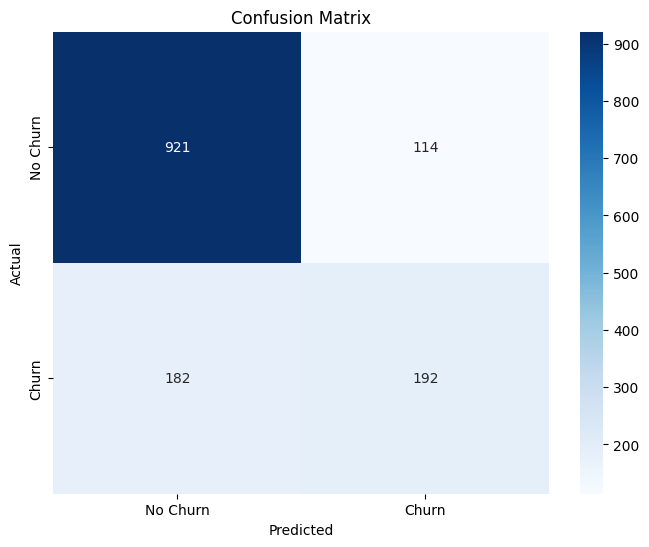

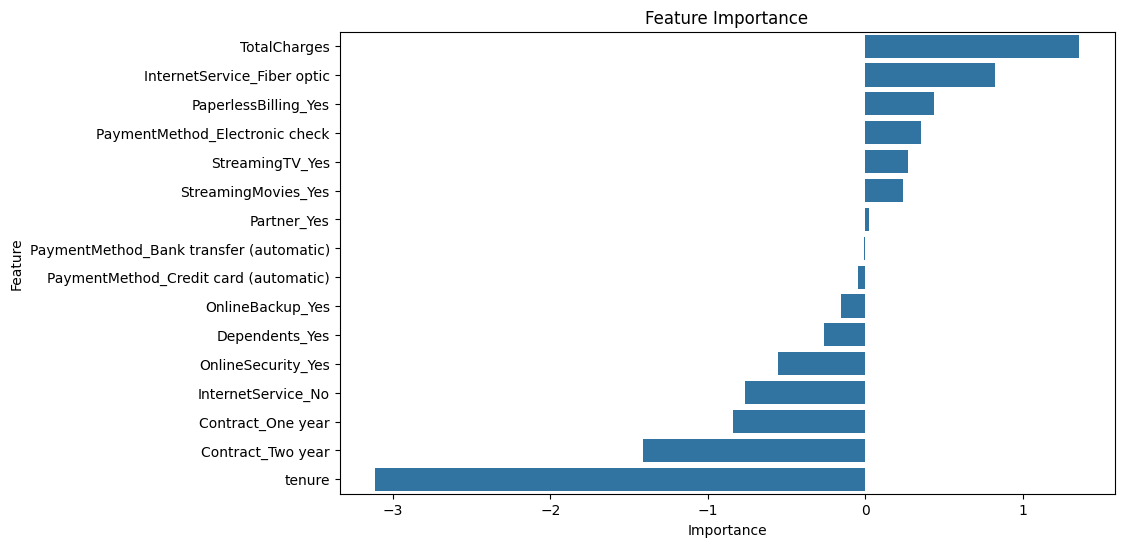

In [10]:
y_pred = model.predict(X_test_selected)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

try:
    feature_importance = pd.DataFrame({'Feature': X_train_selected.columns, 'Importance': model.coef_[0]})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.show()
except AttributeError:
    print("Feature importance is not available for this model type.")